In [1]:
import sympy.matrices
from sympy import init_session
import numpy as np
import matplotlib.pyplot as plt
# get nice printing of matrices
#init_session()
# declare the step size h as a symbol
h = sympy.Symbol('h')

## 1a)

We have $$H(h)=\dfrac{1}{2}x^2+\dfrac{1}{2}v^2\dfrac{1}{1-h^2/4}$$
Which can be written as:
$$2H=x^2+\dfrac{v^2}{1-h^2/4}$$
$$2H=\begin{pmatrix}x_n\\v_n\end{pmatrix}\begin{pmatrix}x_n & \dfrac{v_n}{(1-h^2/4)}\end{pmatrix}$$
$$2H=\begin{pmatrix}x_n\\ \dfrac{v_n}{1+ih/2}\end{pmatrix}\begin{pmatrix}x_n & \dfrac{v_n}{1+ih/2}\end{pmatrix}$$
$$2H_{n+1}=\begin{pmatrix}x_n\\ \dfrac{v_n}{1+ih/2}\end{pmatrix}\cdot J^TJ\begin{pmatrix}x_n & \dfrac{v_n}{1+ih/2}\end{pmatrix}$$

In [18]:
def J_leapfrog(h):
    a = sympy.matrices.Matrix([[1,0],[-h/2,1]])
    b = sympy.matrices.Matrix([[1,h],[0,1]])
    return a*b*a

print('\nLeapfrog JT.J = ')
print(sympy.simplify(J_leapfrog(h).T * J_leapfrog(h)))

x = sympy.Symbol('x')
v = sympy.Symbol('v')
xv1 = sympy.matrices.Matrix([x, v])
xv2 = sympy.matrices.Matrix([x, v/(1-h**2/4)])
H = sympy.matrices.Matrix([1/2*x**2+1/2*v**2/(1-h**2/4)])

print('\nLeapfrog 2H_n+1 = ')
print(sympy.expand(xv1.T * J_leapfrog(h).T * J_leapfrog(h) * xv2))

print('\nLeapfrog 2(H_n+1 - H_n) = ')
print(sympy.expand(xv1.T * J_leapfrog(h).T * J_leapfrog(h) * xv2 - 2*H))


Leapfrog JT.J = 
Matrix([[h**6/16 - h**4/4 + 1, h**3*(2 - h**2)/8], [h**3*(2 - h**2)/8, h**4/4 + 1]])

Leapfrog 2H_n+1 = 
Matrix([[h**6*x**2/16 - h**5*v*x/8 - h**5*v*x/(8 - 2*h**2) + h**4*v**2/(4 - h**2) - h**4*x**2/4 + h**3*v*x/4 + h**3*v*x/(4 - h**2) + v**2/(1 - h**2/4) + x**2]])

Leapfrog 2(H_n+1 - H_n) = 
Matrix([[h**6*x**2/16 - h**5*v*x/8 - h**5*v*x/(8 - 2*h**2) + h**4*v**2/(4 - h**2) - h**4*x**2/4 + h**3*v*x/4 + h**3*v*x/(4 - h**2)]])


Subtracting $H_{n+1}-H_n$, you are left with terms that average to zero. Therefore, it is a conserved quantity.

## b)

difference in pseudo H after 1 periods 4.973799150320701e-14


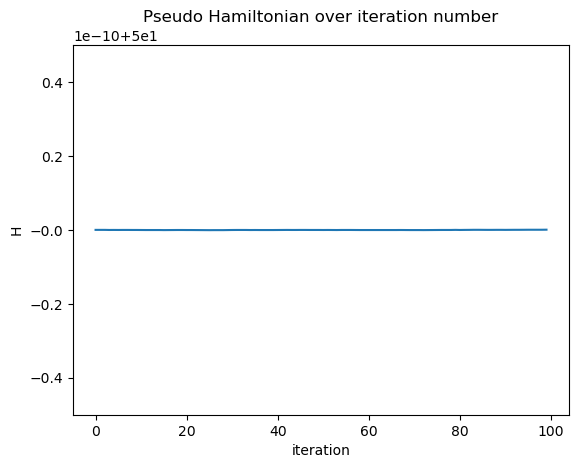

In [3]:
def pseudo_H(x,h):
    return 1/2*x[0]**2 + 1/2*x[1]**2/(1-(h**2)/4)

def Integrator(x0,nsteps,p,func):
    h = 2*np.pi / nsteps
    x = np.empty((int(nsteps*p),len(x0)))
    x[0] = x0
    H = np.empty(int(nsteps*p))
    H[0] = func(x0,h)
    for i in range(int(nsteps*p)-1):
        x[i+1] = J_leapfrog(h)@(x[i])
        H[i+1] = func(x[i+1],h)
    return x, H

nsteps = 100   # number of steps per period
p = 1 # number of periods
x0 = np.array((10,0))

x, H = Integrator(x0,nsteps,p,pseudo_H)

plt.title('Pseudo Hamiltonian over iteration number')
plt.plot(H)
plt.xlabel('iteration')
plt.ylabel('H')

print('difference in pseudo H after',p, 'periods', H[-1]-H[0])

We see that the pseudo Hamiltonian stays constant over time.

scaling of the pseudo Hamiltonian error with the number of steps per oscillation cycle

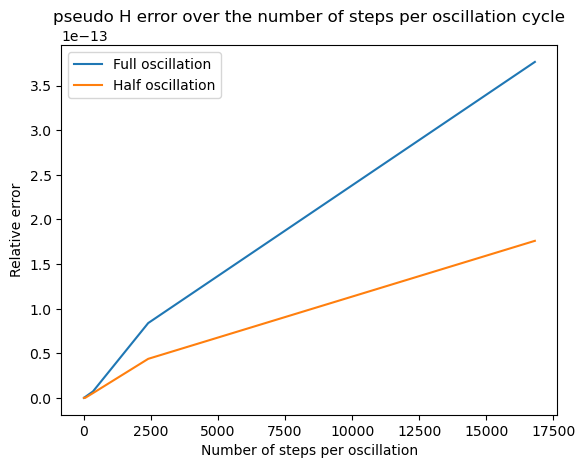

In [5]:
p1 = 1 # full oscillation
p2 = 0.5 # half oscillation

powers = 5
Error1 = np.empty(powers)
Error2 = np.empty(powers)
Nsteps = np.empty(powers)
for i in range(powers):
    nsteps = 7**(i+1)   # number of steps per period
    Nsteps[i] = nsteps
    x0 = np.array((10,0))
    x1, H1 = Integrator(x0,nsteps,p1,pseudo_H)
    Error1[i] = (abs(H1[-1]-H1[0]))/H1[0]
    x2, H2 = Integrator(x0,nsteps,p2,pseudo_H)
    Error2[i] = (abs(H2[-1]-H2[0]))/H2[0]

plt.title('pseudo H error over the number of steps per oscillation cycle')
plt.xlabel('Number of steps per oscillation')
plt.ylabel('Relative error')
plt.plot(Nsteps,Error1,label='Full oscillation')
plt.plot(Nsteps,Error2, label='Half oscillation')
plt.legend()
    

The leapfrog method is symplectic which means that in theory, the phase space volume should be conserved. Instead, here we see that the error increases over time. The slope of the error for a full oscillation is double that of a half oscillation. This is because there are twice as many time steps in a full oscillation, and with each step, we accumulate 
roundoff error.  

## c) 
Scaling of energy error

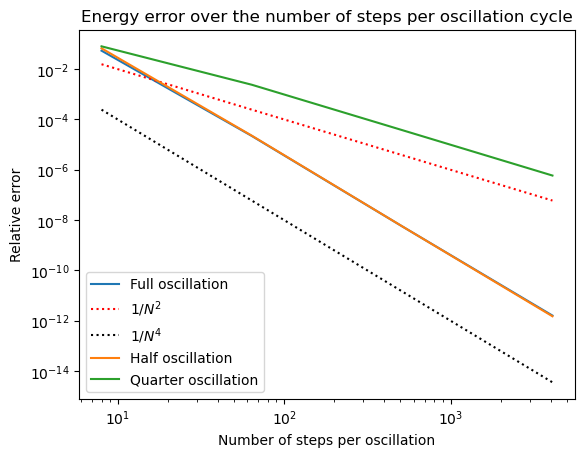

In [30]:
def Energy(x,h):
    return 1/2*x[0]**2 + 1/2*x[1]**2

p1 = 1 # full oscillation
p2 = 0.5 # half oscillation
p3 = 0.25 # quarter oscillation

powers = 4
Error1 = np.empty(powers)
Error2 = np.empty(powers)
Nsteps = np.empty(powers)
Error3 = np.empty(powers)
Nstep3 = np.empty(powers)
for i in range(powers):
    nsteps = 8**(i+1)   # number of steps per period
    Nsteps[i] = nsteps
    x0 = np.array((10,0))
    x1, H1 = Integrator(x0,nsteps,p1,Energy)
    Error1[i] = (abs(H1[-1]-H1[0]))/H1[0]
    x2, H2 = Integrator(x0,nsteps,p2,Energy)
    Error2[i] = (abs(H2[-1]-H2[0]))/H2[0]
    x3, H3 = Integrator(x0,nsteps,p3,Energy)
    Error3[i] = (abs(H3[-1]-H3[0]))/H3[0]

plt.title('Energy error over the number of steps per oscillation cycle')
plt.xlabel('Number of steps per oscillation')
plt.ylabel('Relative error')
plt.loglog(Nsteps,Error1,label='Full oscillation')
plt.loglog(Nsteps,Nsteps**(-2),'r:',label='$1/N^2$')
plt.loglog(Nsteps,Nsteps**(-4),'k:',label='$1/N^4$')
plt.loglog(Nsteps,Error2, label='Half oscillation')
plt.loglog(Nsteps,Error3, label='Quarter oscillation')
plt.legend()

Quarter oscillation: scaling ~$\dfrac{1}{N^2}$

Half and full oscillation: scaling ~$\dfrac{1}{N^4}$

From class we have:
Leapfrog $$2E_{n+1}=\dfrac{h^6x^2}{16}-\dfrac{h^5vx}{4}+\dfrac{h^4v^2}{4}
-\dfrac{h^4x^2}{4}+\dfrac{h^3vx}{2}+v^2+x^2$$

$$2E_{n+1}-2E_n=\dfrac{h^6x^2}{16}-\dfrac{h^5vx}{4}+\dfrac{h^4v^2}{4}
-\dfrac{h^4x^2}{4}+\dfrac{h^3vx}{2}$$


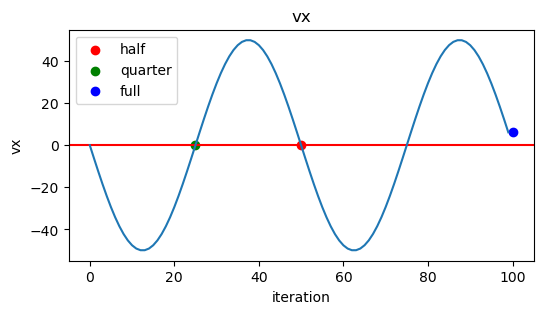

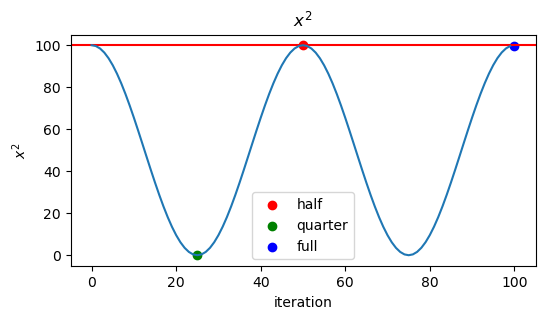

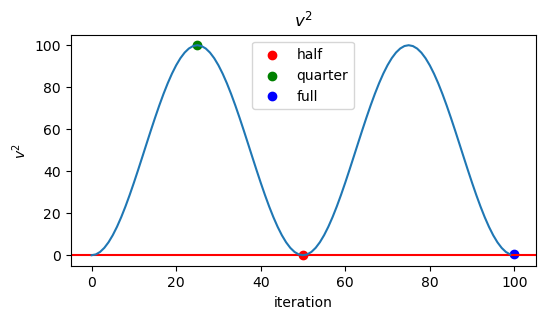

In [51]:
nsteps = 100   # number of steps per period
p = 1 # number of periods
x0 = np.array((10,0))

x, E = Integrator(x0,nsteps,p,Energy)

def Plot(nsteps,param,title):
    plt.figure(figsize=(6,3))
    plt.title(title)
    plt.axhline(param[0],color='r')
    plt.scatter(np.array([nsteps/2]),param[int(nsteps/2)],color='r',label='half')
    plt.scatter(np.array([nsteps/4]),param[int(nsteps/4)],color='g',label='quarter')
    plt.scatter(np.array([nsteps]),param[nsteps-1],color='b',label='full')
    plt.plot(param)
    plt.xlabel('iteration')
    plt.ylabel(title)
    plt.legend()
    
vx = x[:,1]*x[:,0]
Plot(nsteps,vx,'vx')

x2 = x[:,0]**2
Plot(nsteps,x2,'$x^2$')

v2 = x[:,1]**2
Plot(nsteps,v2,'$v^2$')

We see that for a quarter oscillation, the $x^2$ and $v^2$ terms will contribute. With that comes error scaling $\propto h^4$